The CRISP-DM Methodology will be followed for this project.
# 1. Business Understanding
The COVID-19 pandemic has started spreading across India. To put things in perspective, I decided to analyze data related to the spread of this disease in India. The analysis uses the dataset from the following link: https://www.kaggle.com/sudalairajkumar/covid19-in-india/data


### The analysis focuses on answering the 3 questions below:
##### 1. Which states have the maximum number of infected people?
##### 2. How do the number of infected people change over time for these states?
##### 3. How did the number of cured vs dead people in each of these states change over time?

# 2. Data Understanding

In [101]:
# Import Required Libraries
import pandas
import matplotlib.pyplot as plt
import datetime
import matplotlib.dates as mdates

In [97]:
# Load the dataset
daily = pandas.read_csv('dataset/covid_19_india.csv')
daily.head()

,Sno,Date,State/UnionTerritory,ConfirmedIndianNational,ConfirmedForeignNational,ConfirmedTotal,Cured,Deaths
0,1,30-01-20,Kerala,1,0,1,0,0
1,2,31-01-20,Kerala,1,0,1,0,0
2,3,01-02-20,Kerala,2,0,2,0,0
3,4,02-02-20,Kerala,3,0,3,0,0
4,5,03-02-20,Kerala,3,0,3,0,0


In [3]:
daily.tail()

,Sno,Date,State/UnionTerritory,ConfirmedIndianNational,ConfirmedForeignNational,ConfirmedTotal,Cured,Deaths
387,388,26-03-20,Tamil Nadu,20,6,26,1,1
388,389,26-03-20,Telengana,34,10,44,1,0
389,390,26-03-20,Uttarakhand,4,1,5,0,0
390,391,26-03-20,Uttar Pradesh,40,1,41,11,0
391,392,26-03-20,West Bengal,10,0,10,0,1


# 3. Data Preparation

In [95]:
# Drop Columns with missing data
daily = daily.dropna()
daily.tail() #No missing data

# Drop Unwanted Columnns
daily.drop(['Sno', 'ConfirmedIndianNational', 'ConfirmedForeignNational'], axis = 1) 

,Date,State/UnionTerritory,ConfirmedTotal,Cured,Deaths
0,30-01-20,Kerala,1,0,0
1,31-01-20,Kerala,1,0,0
2,01-02-20,Kerala,2,0,0
3,02-02-20,Kerala,3,0,0
4,03-02-20,Kerala,3,0,0
...,...,...,...,...,...
387,26-03-20,Tamil Nadu,26,1,1
388,26-03-20,Telengana,44,1,0
389,26-03-20,Uttarakhand,5,0,0
390,26-03-20,Uttar Pradesh,41,11,0


# 4. Answering Questions from Data 

### Q1. Which states have the maximum number of infected people?

In [13]:
# Get the number of infected people in the Top 5 Infected States 

slist = []
state = []
st_metric = []
case = []
i = 2
while(len(state) != 5):
    keys = daily['ConfirmedTotal'].nlargest(i).keys()
    for index in keys:
        if daily['State/UnionTerritory'][index] not in slist:
            state.append(daily['State/UnionTerritory'][index])
            case.append(daily['ConfirmedTotal'][index])
            slist.append(daily['State/UnionTerritory'][index])
    i += 1

<BarContainer object of 5 artists>

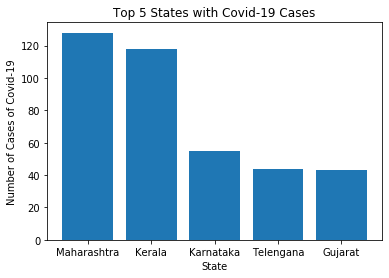

In [47]:
plt.xlabel('State')
plt.ylabel('Number of Cases of Covid-19')
plt.title('Top 5 States with Covid-19 Cases')
plt.bar(state, case)

From the above bar plot, it can be concluded that Maharashtra has the maximum number of cases (128), followed by Kerala (118), then Karnataka (55), then Telengana (44) and finally Gujarat (43)

### Q2. How do the number of infected people change over time for these states?

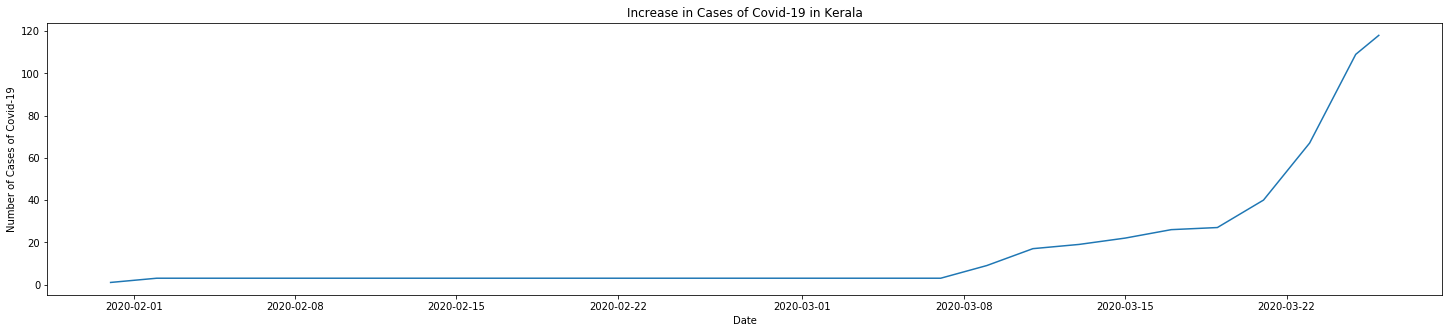

In [100]:
date_set_ke = set({})
date_ax_ke = []
val_ax_ke = []
for i in range(392):
    if daily.loc[i]['State/UnionTerritory'] == 'Kerala' and daily.loc[i]['Date'] not in date_set_ke:
        date_ax_ke.append(daily.loc[i]['Date'])
        val_ax_ke.append(daily.loc[i]['ConfirmedTotal'])
        date_set_ke.add(daily.loc[i]['Date'])
for i in range(int(len(date_ax_ke)/2)):
    del(date_ax_ke[i])
    del(val_ax_ke[i])    
for i in range(len(date_ax_ke)):
    date_ax_ke[i] = datetime.date(2020, int(date_ax_ke[i].split('-')[1]), int(date_ax_ke[i].split('-')[0]))  
fig, ax = plt.subplots(1, 1, figsize = (25, 5))
plt.xlabel('Date')
plt.ylabel('Number of Cases of Covid-19')
plt.title('Increase in Cases of Covid-19 in Kerala')
ax.plot(date_ax_ke, val_ax_ke)

From the above graph, it can be concluded that a sharp rise in the number of cases was observed in Kerala after 15th March 2020

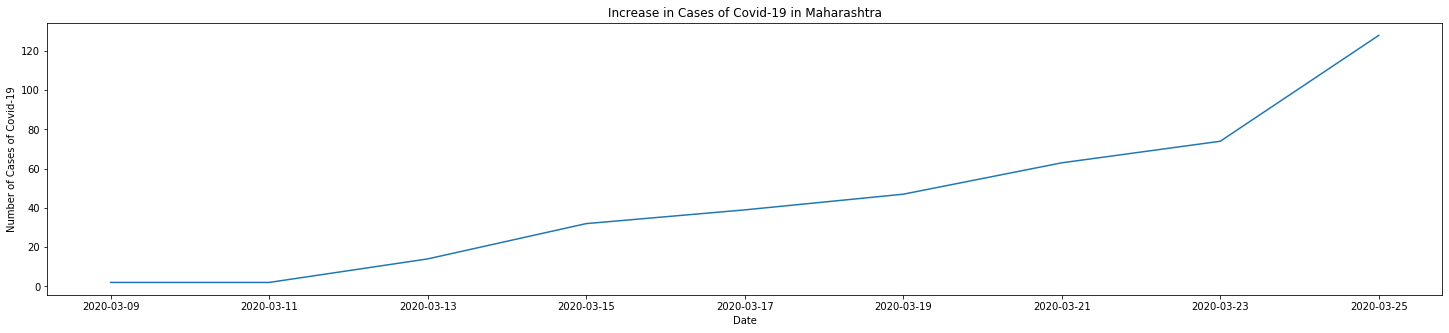

In [84]:
date_set_ma = set({})
date_ax_ma = []
val_ax_ma = []
for i in range(392):
    if daily.loc[i]['State/UnionTerritory'] == 'Maharashtra' and daily.loc[i]['Date'] not in date_set_ma:
        date_ax_ma.append(daily.loc[i]['Date'])
        val_ax_ma.append(daily.loc[i]['ConfirmedTotal'])
        date_set_ma.add(daily.loc[i]['Date'])
for i in range(int(len(date_ax_ma)/2)):
    del(date_ax_ma[i + 1])
    del(val_ax_ma[i + 1])    
for i in range(len(date_ax_ma)):
    date_ax_ma[i] = datetime.date(2020, int(date_ax_ma[i].split('-')[1]), int(date_ax_ma[i].split('-')[0]))  
fig, ax = plt.subplots(1, 1, figsize = (25, 5))
plt.xlabel('Date')
plt.ylabel('Number of Cases of Covid-19')
plt.title('Increase in Cases of Covid-19 in Maharashtra')
ax.plot(date_ax_ma, val_ax_ma)

From the above graph, it can be seen that the number of cases steadily increased from 15th March followed by a sudden increase from 23rd March 2020

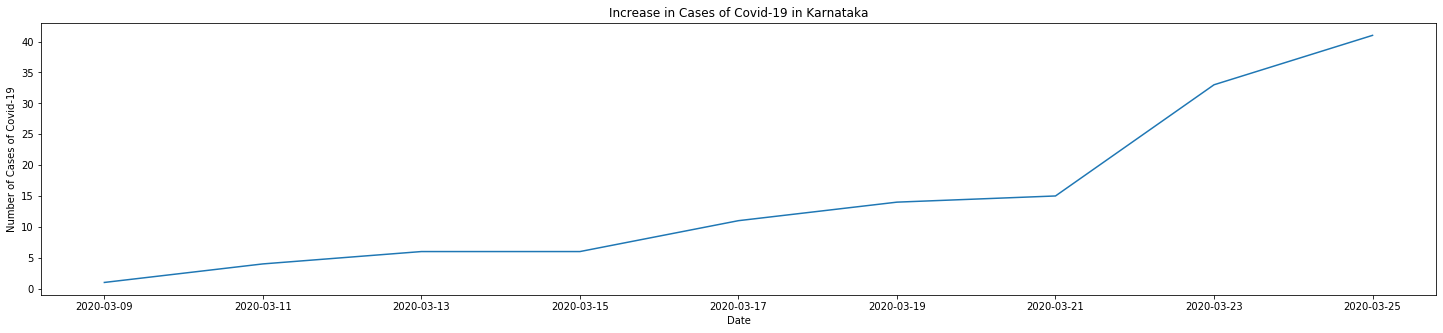

In [85]:
import datetime
date_set_ka = set({})
date_ax_ka = []
val_ax_ka = []
for i in range(392):
    if daily.loc[i]['State/UnionTerritory'] == 'Karnataka' and daily.loc[i]['Date'] not in date_set_ka:
        date_ax_ka.append(daily.loc[i]['Date'])
        val_ax_ka.append(daily.loc[i]['ConfirmedTotal'])
        date_set_ka.add(daily.loc[i]['Date'])
for i in range(int(len(date_ax_ka)/2)):
    del(date_ax_ka[i + 1])
    del(val_ax_ka[i + 1])    
for i in range(len(date_ax_ka)):
    date_ax_ka[i] = datetime.date(2020, int(date_ax_ka[i].split('-')[1]), int(date_ax_ka[i].split('-')[0]))  
fig, ax = plt.subplots(1, 1, figsize = (25, 5))
plt.xlabel('Date')
plt.ylabel('Number of Cases of Covid-19')
plt.title('Increase in Cases of Covid-19 in KarnatakaFrom the above graph, it can be concluded that a sharp rise in the number of cases was after 15th March 2020')
ax.plot(date_ax_ka, val_ax_ka)

From the above graph, it can be concluded that Karnataka has witnessed a steady rate of increase in the number of patients till 21st March, after which the number of cases almost doubled

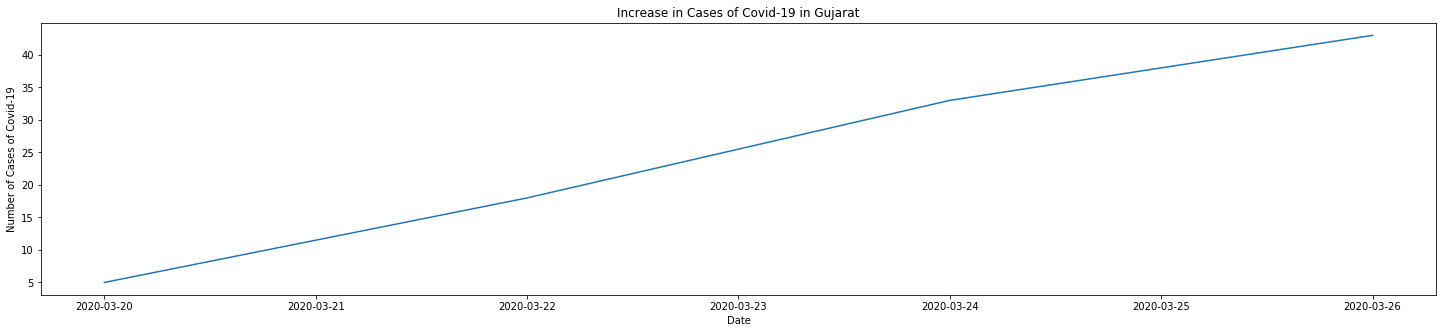

In [86]:
date_set_gu = set({})
date_ax_gu = []
val_ax_gu = []
for i in range(392):
    if daily.loc[i]['State/UnionTerritory'] == 'Gujarat' and daily.loc[i]['Date'] not in date_set_gu:
        date_ax_gu.append(daily.loc[i]['Date'])
        val_ax_gu.append(daily.loc[i]['ConfirmedTotal'])
        date_set_gu.add(daily.loc[i]['Date'])
for i in range(int(len(date_ax_gu)/2)):
    del(date_ax_gu[i + 1])
    del(val_ax_gu[i + 1])    
for i in range(len(date_ax_gu)):
    date_ax_gu[i] = datetime.date(2020, int(date_ax_gu[i].split('-')[1]), int(date_ax_gu[i].split('-')[0]))  
fig, ax = plt.subplots(1, 1, figsize = (25, 5))
plt.xlabel('Date')
plt.ylabel('Number of Cases of Covid-19')
plt.title('Increase in Cases of Covid-19 in GujaratFrom the above graph, it can be concluded that a sharp rise in the number of cases was after 15th March 2020')
ax.plot(date_ax_gu, val_ax_gu)

From the above graph, it can be concluded that given the limited data available, Gujarat saw a steady rise in the number of patients

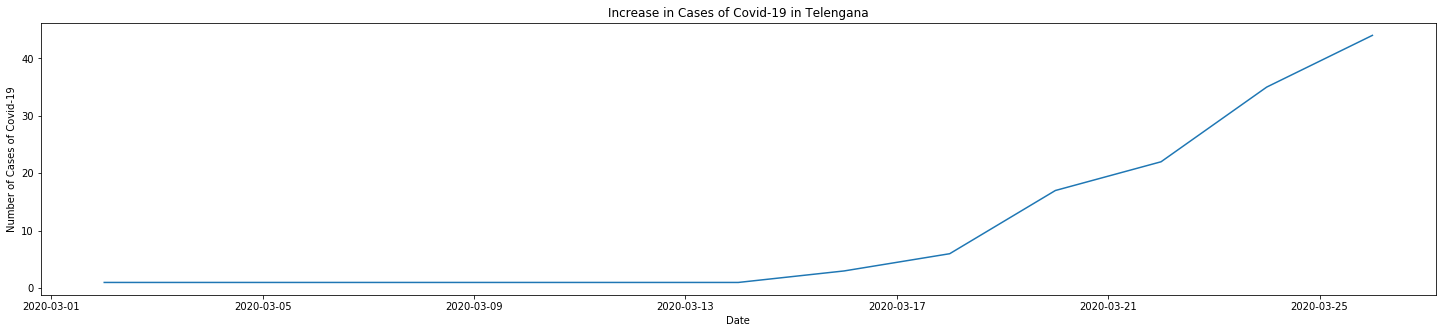

In [87]:
date_set_te = set({})
date_ax_te = []
val_ax_te = []
for i in range(392):
    if daily.loc[i]['State/UnionTerritory'] == 'Telengana' and daily.loc[i]['Date'] not in date_set_te:
        date_ax_te.append(daily.loc[i]['Date'])
        val_ax_te.append(daily.loc[i]['ConfirmedTotal'])
        date_set_te.add(daily.loc[i]['Date'])
for i in range(int(len(date_ax_te)/2)):
    del(date_ax_te[i + 1])
    del(val_ax_te[i + 1])    
for i in range(len(date_ax_te)):
    date_ax_te[i] = datetime.date(2020, int(date_ax_te[i].split('-')[1]), int(date_ax_te[i].split('-')[0]))  
fig, ax = plt.subplots(1, 1, figsize = (25, 5))
From the above graph, it can be concluded that a sharp rise in the number of cases was after 15th March 2020
ax.plot(date_ax_te, val_ax_te)

From the above graph, it can be concluded that Telangana witnessed a sudden rise in the number of cases after 17th March 2020, almost doubling every two days

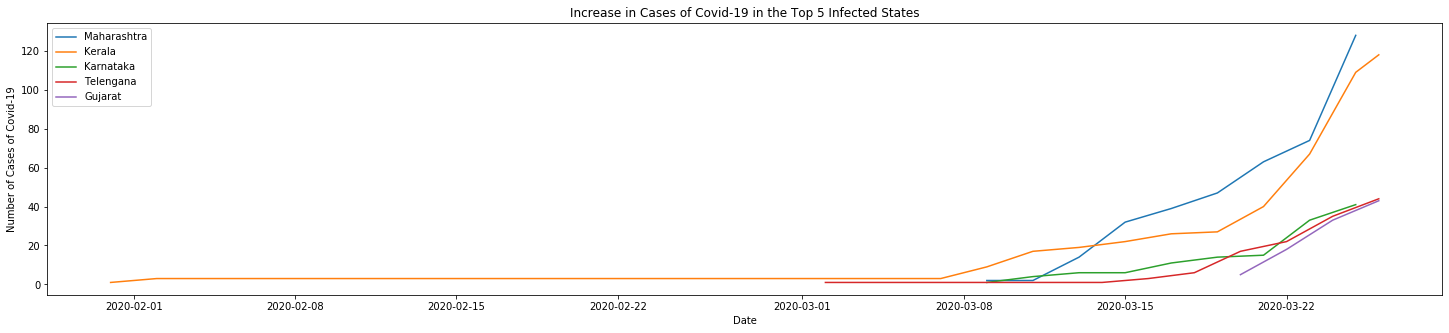

In [88]:
# How do the rates compare to each other?

fig, ax = plt.subplots(1, 1, figsize = (25, 5))
ax.plot(date_ax_ma, val_ax_ma)
ax.plot(date_ax_ke, val_ax_ke)
ax.plot(date_ax_ka, val_ax_ka)
ax.plot(date_ax_te, val_ax_te)
ax.plot(date_ax_gu, val_ax_gu)
plt.xlabel('Date')
plt.ylabel('Number of Cases of Covid-19')
plt.title('Increase in Cases of Covid-19 in the Top 5 Infected States')
ax.legend(('Maharashtra', 'Kerala', 'Karnataka', 'Telengana', 'Gujarat'))

From the above comparison, it can be seen that Maharashtra has witnessed the most drastic increase in the number of cases

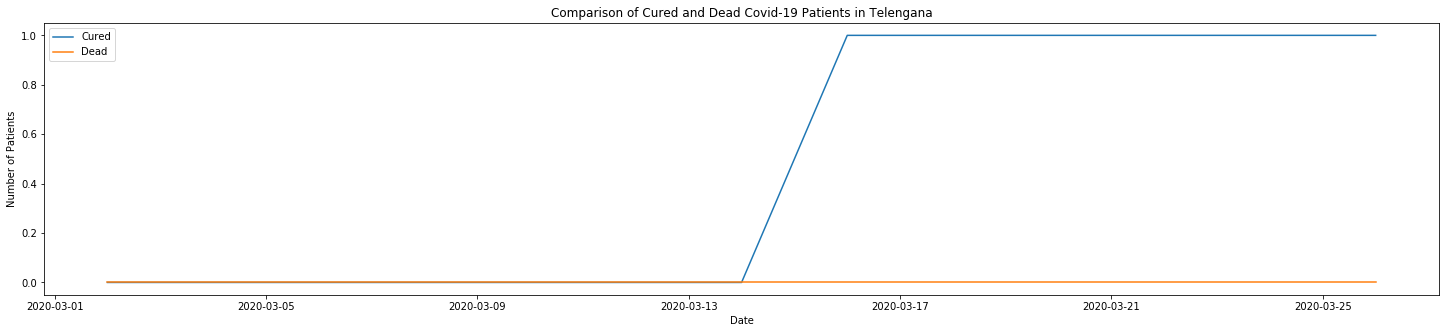

In [89]:
# Cured vs Dead Telengana
date_set_te = set({})
date_ax_te = []
val_ax_c_te = []
val_ax_d_te = []
for i in range(392):
    if daily.loc[i]['State/UnionTerritory'] == 'Telengana' and daily.loc[i]['Date'] not in date_set_te:
        date_ax_te.append(daily.loc[i]['Date'])
        val_ax_c_te.append(daily.loc[i]['Cured'])
        date_set_te.add(daily.loc[i]['Date'])
        val_ax_d_te.append(daily.loc[i]['Deaths'])
for i in range(int(len(date_ax_te)/2)):
    del(date_ax_te[i + 1])
    del(val_ax_c_te[i + 1])
    del(val_ax_d_te[i + 1])    

for i in range(len(date_ax_te)):
    date_ax_te[i] = datetime.date(2020, int(date_ax_te[i].split('-')[1]), int(date_ax_te[i].split('-')[0]))  
fig, ax = plt.subplots(1, 1, figsize = (25, 5))
plt.xlabel('Date')
plt.ylabel('Number of Patients')
plt.title('Comparison of Cured and Dead Covid-19 Patients in Telengana')
ax.plot(date_ax_te, val_ax_c_te)
ax.plot(date_ax_te, val_ax_d_te)
ax.legend(('Cured', 'Dead'))

One person was cured while there were no fatalities

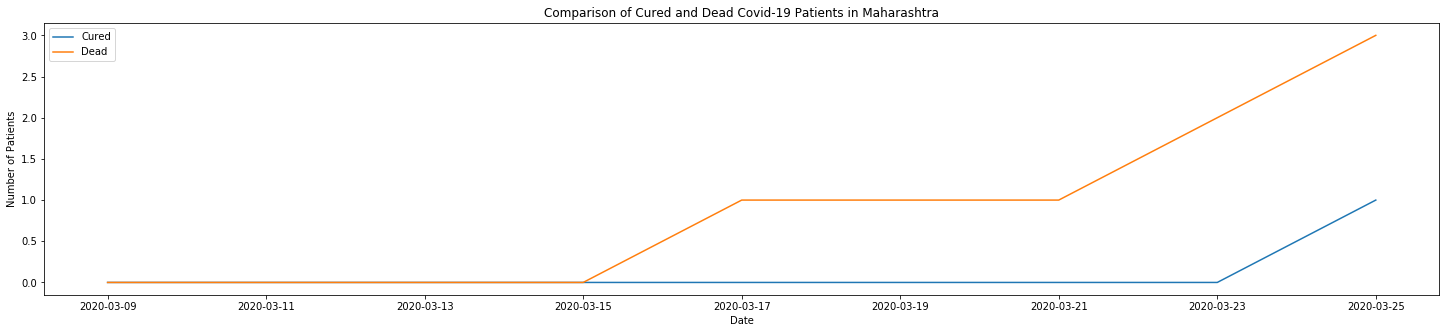

In [90]:
# Cured vs Dead Maharashtra
dama_set_ma = set({})
dama_ax_ma = []
val_ax_c_ma = []
val_ax_d_ma = []
for i in range(392):
    if daily.loc[i]['State/UnionTerritory'] == 'Maharashtra' and daily.loc[i]['Date'] not in dama_set_ma:
        dama_ax_ma.append(daily.loc[i]['Date'])
        val_ax_c_ma.append(daily.loc[i]['Cured'])
        dama_set_ma.add(daily.loc[i]['Date'])
        val_ax_d_ma.append(daily.loc[i]['Deaths'])
for i in range(int(len(dama_ax_ma)/2)):
    del(dama_ax_ma[i + 1])
    del(val_ax_c_ma[i + 1])
    del(val_ax_d_ma[i + 1])    

for i in range(len(dama_ax_ma)):
    dama_ax_ma[i] = datetime.date(2020, int(dama_ax_ma[i].split('-')[1]), int(dama_ax_ma[i].split('-')[0]))  
fig, ax = plt.subplots(1, 1, figsize = (25, 5))
plt.xlabel('Date')
plt.ylabel('Number of Patients')
plt.title('Comparison of Cured and Dead Covid-19 Patients in Maharashtra')
ax.plot(dama_ax_ma, val_ax_c_ma)
ax.plot(dama_ax_ma, val_ax_d_ma)
ax.legend(('Cured', 'Dead'))

3 People are dead while one person has been cured

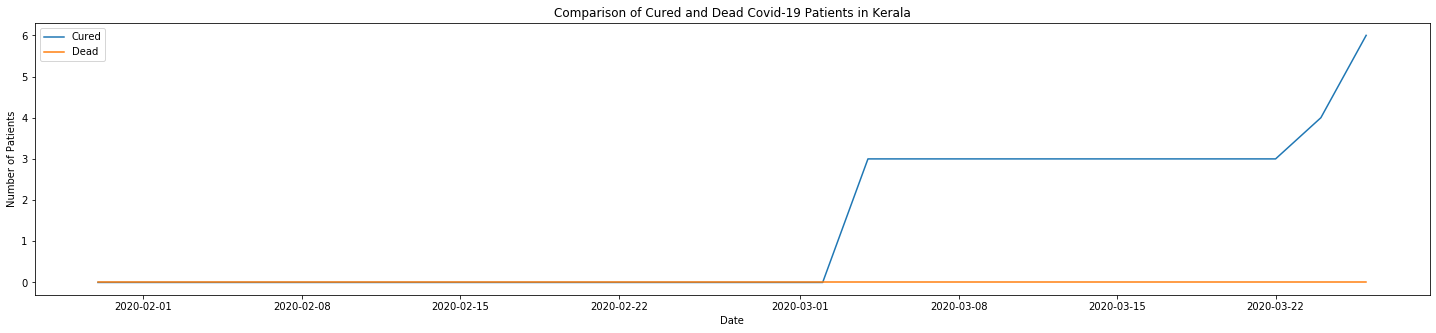

In [91]:
# Cured vs Dead Kerala
dake_set_ke = set({})
dake_ax_ke = []
val_ax_c_ke = []
val_ax_d_ke = []
for i in range(392):
    if daily.loc[i]['State/UnionTerritory'] == 'Kerala' and daily.loc[i]['Date'] not in dake_set_ke:
        dake_ax_ke.append(daily.loc[i]['Date'])
        val_ax_c_ke.append(daily.loc[i]['Cured'])
        dake_set_ke.add(daily.loc[i]['Date'])
        val_ax_d_ke.append(daily.loc[i]['Deaths'])
for i in range(int(len(dake_ax_ke)/2)):
    del(dake_ax_ke[i + 1])
    del(val_ax_c_ke[i + 1])
    del(val_ax_d_ke[i + 1])    

for i in range(len(dake_ax_ke)):
    dake_ax_ke[i] = datetime.date(2020, int(dake_ax_ke[i].split('-')[1]), int(dake_ax_ke[i].split('-')[0]))  
fig, ax = plt.subplots(1, 1, figsize = (25, 5))
plt.xlabel('Date')
plt.ylabel('Number of Patients')
plt.title('Comparison of Cured and Dead Covid-19 Patients in Kerala')
ax.plot(dake_ax_ke, val_ax_c_ke)
ax.plot(dake_ax_ke, val_ax_d_ke)
ax.legend(('Cured', 'Dead'))

6 people were cured in Kerala, while there are no fatalities

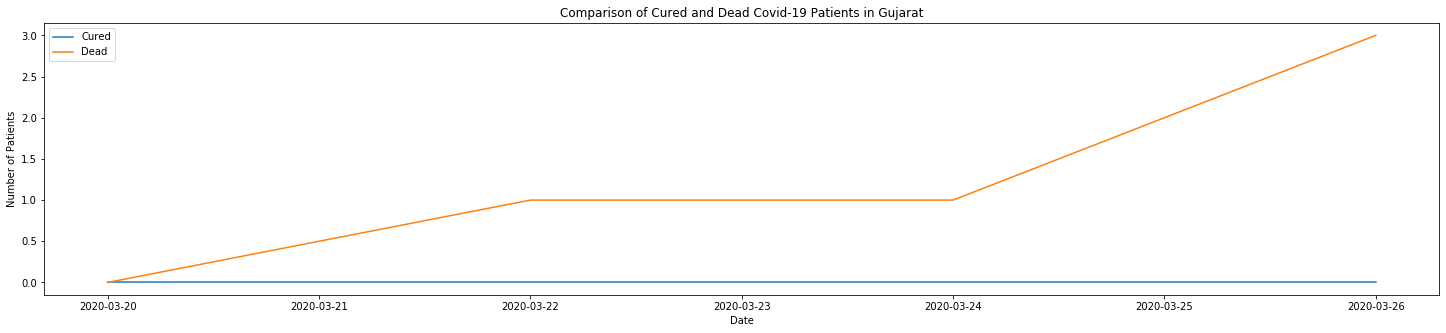

In [92]:
# Cured vs Dead Gujarat
dagu_set_gu = set({})
dagu_ax_gu = []
val_ax_c_gu = []
val_ax_d_gu = []
for i in range(392):
    if daily.loc[i]['State/UnionTerritory'] == 'Gujarat' and daily.loc[i]['Date'] not in dagu_set_gu:
        dagu_ax_gu.append(daily.loc[i]['Date'])
        val_ax_c_gu.append(daily.loc[i]['Cured'])
        dagu_set_gu.add(daily.loc[i]['Date'])
        val_ax_d_gu.append(daily.loc[i]['Deaths'])
for i in range(int(len(dagu_ax_gu)/2)):
    del(dagu_ax_gu[i + 1])
    del(val_ax_c_gu[i + 1])
    del(val_ax_d_gu[i + 1])    

for i in range(len(dagu_ax_gu)):
    dagu_ax_gu[i] = datetime.date(2020, int(dagu_ax_gu[i].split('-')[1]), int(dagu_ax_gu[i].split('-')[0]))  
fig, ax = plt.subplots(1, 1, figsize = (25, 5))
plt.xlabel('Date')
plt.ylabel('Number of Patients')
plt.title('Comparison of Cured and Dead Covid-19 Patients in Gujarat')
ax.plot(dagu_ax_gu, val_ax_c_gu)
ax.plot(dagu_ax_gu, val_ax_d_gu)
ax.legend(('Cured', 'Dead'))

3 people have died in Kerala, whereas none have been reported as cured yet

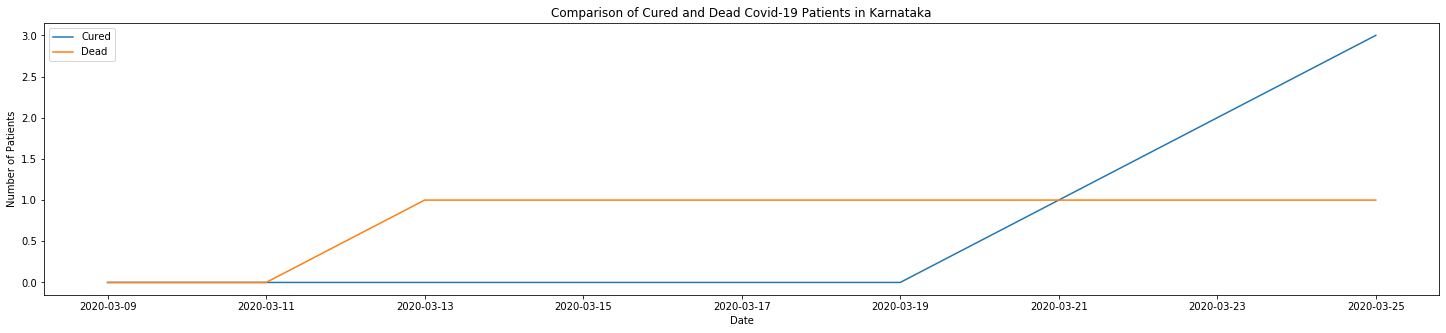

In [93]:
# Cured vs Dead Karnataka
daka_set_ka = set({})
daka_ax_ka = []
val_ax_c_ka = []
val_ax_d_ka = []

for i in range(392):
    if daily.loc[i]['State/UnionTerritory'] == 'Karnataka' and daily.loc[i]['Date'] not in daka_set_ka:
        daka_ax_ka.append(daily.loc[i]['Date'])
        val_ax_c_ka.append(daily.loc[i]['Cured'])
        daka_set_ka.add(daily.loc[i]['Date'])
        val_ax_d_ka.append(daily.loc[i]['Deaths'])
for i in range(int(len(daka_ax_ka)/2)):
    del(daka_ax_ka[i + 1])
    del(val_ax_c_ka[i + 1])
    del(val_ax_d_ka[i + 1])    

for i in range(len(daka_ax_ka)):
    daka_ax_ka[i] = datetime.date(2020, int(daka_ax_ka[i].split('-')[1]), int(daka_ax_ka[i].split('-')[0]))  
fig, ax = plt.subplots(1, 1, figsize = (25, 5))
plt.xlabel('Date')
plt.ylabel('Number of Patients')
plt.title('Comparison of Cured and Dead Covid-19 Patients in Karnataka')
ax.plot(daka_ax_ka, val_ax_c_ka)
ax.plot(daka_ax_ka, val_ax_d_ka)
ax.legend(('Cured', 'Dead'))

3 people have been successfully cured in Karnataka. However, one person has died